In [196]:
import torch
import numpy as np
from matplotlib_inline import backend_inline
import matplotlib.pyplot as plt
import math
from torch.distributions import multinomial
# %matplotlib inline

def use_svg_display():
    backend_inline.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

    
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid()


def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    if legend is None:
        legend = []
    set_figsize(figsize)
    axes = axes if axes else plt.gca()
    
    def has_one_axes(X):
        return hasattr(X,"ndim") and X.ndim == 1 or isinstance(X,list) \
               and not hasattr(X[0],"__len__")
    if has_one_axes(X):
        X = [X]
    if Y is None:
        X, Y = [[]]*len(X), X
    elif has_one_axes(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

    
def f(x):
    return x**2 -3 * x + 3.25


def f1(x):
    return x**3 - 1/x


def f2(x):
    b = x * 2
    while b.norm() < 100:
        b = b * 2
    if b.sum() <= 0:
        b = 100 * b
    return b


def sin(x):
    return torch.sin(x)

/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


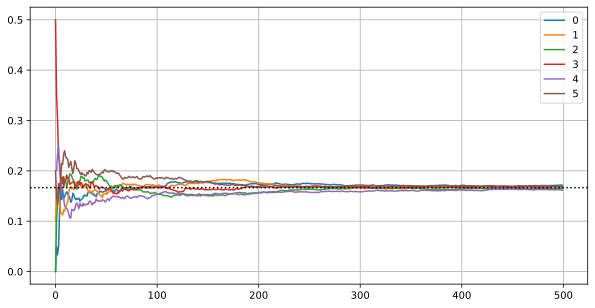

In [198]:
probs = torch.ones(6)/6
# multinomial.Multinomial(1,probs).sample()
s = multinomial.Multinomial(10, probs).sample((500,))
s.shape
s_cum = s.cumsum(axis=0)
s_prob = s_cum/s_cum.sum(axis=1,keepdims=True)

plt.figure(figsize=(10,5))
plt.grid()
for i in range(len(probs)):
    plt.plot(s_prob[:,i].numpy(),label=str(i))
plt.axhline(1/6,c='black',ls=':')
plt.legend()

plt.show()

In [139]:
sin(x).sum().backward()

/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


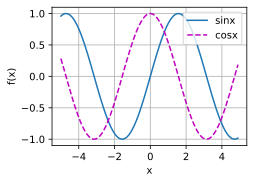

In [201]:
x = torch.arange(-5,5,0.1)
x.requires_grad=True
y = sin(x)
y.sum().backward()
plot(x.detach(),[sin(x).detach(),x.grad],'x','f(x)',legend=['sinx','cosx'])

/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/envs/d2l/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


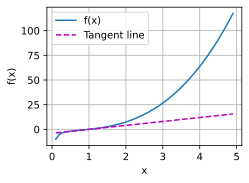

In [200]:
X = np.arange(0.1,5,0.1)
plot(X,[f1(X),4*X-4],'x','f(x)',legend=['f(x)','Tangent line'])